### <h2><center><font color='orange'>Exploratory Data Analysis<font></a>

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [70]:
# Load the dataset
df = pd.read_csv('personal-loan.csv')
df=data.copy()
df

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5440,36.0,4.0,1.0,Undergraduate,72.0,0,no,0.0,0,0,yes,no
5996,1251,56.0,25.0,2.0,Undergraduate,110.0,0,no,0.0,0,0,no,no
5997,2454,34.0,11.0,2.0,Advanced or Professional,57.0,0,no,0.0,1,0,yes,no
5998,1435,30.0,NaN,2.0,Undergraduate,85.0,81,no,0.0,0,0,yes,no


In [71]:
# Display the first few rows of the dataset
df.head(5)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


In [72]:
df.tail(5)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
5995,5440,36.0,4.0,1.0,Undergraduate,72.0,0,no,0.0,0,0,yes,no
5996,1251,56.0,25.0,2.0,Undergraduate,110.0,0,no,0.0,0,0,no,no
5997,2454,34.0,11.0,2.0,Advanced or Professional,57.0,0,no,0.0,1,0,yes,no
5998,1435,30.0,NaN,2.0,Undergraduate,85.0,81,no,0.0,0,0,yes,no
5999,1409,47.0,22.0,3.0,Graduate,141.0,0,yes,2.1,0,0,no,no


In [73]:
print("\t\t\t-------------------")
print("Shape of the dataframe is:","Columns || Rows")
print("\t\t\t-------------------")
print("\t\t\t      ",df.shape)

			-------------------
Shape of the dataframe is: Columns || Rows
			-------------------
			       (6000, 13)


In [107]:
# Basic statistics of the dataset
df.describe(include='all')

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
count,6000.000000,5620.000000,5636.000000,5615.000000,6000,5623.000000,6000.000000,6000,6000.000000,6000.000000,6000.000000,6000,6000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,2,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,Undergraduate,NaN,NaN,no,NaN,NaN,NaN,yes,no
freq,NaN,NaN,NaN,NaN,2455,NaN,NaN,4217,NaN,NaN,NaN,3613,5100
mean,3027.886667,45.556940,21.182221,2.468566,NaN,88.143873,67.585667,NaN,0.627467,0.099167,0.078167,NaN,NaN
std,1723.488432,13.373778,13.247945,1.215636,NaN,48.736053,88.155099,NaN,1.423450,0.298911,0.268456,NaN,NaN
min,3.000000,23.000000,0.000000,1.000000,NaN,8.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,1553.750000,34.000000,10.000000,1.000000,NaN,52.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
50%,3045.500000,45.000000,21.000000,2.000000,NaN,82.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
75%,4511.000000,56.000000,32.000000,4.000000,NaN,118.000000,125.000000,NaN,0.400000,0.000000,0.000000,NaN,NaN


In [74]:
# Check for missing values
print(" Columns \t Null Values")
print("----------------------------")
print(data.isnull().sum())


 Columns 	 Null Values
----------------------------
customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64


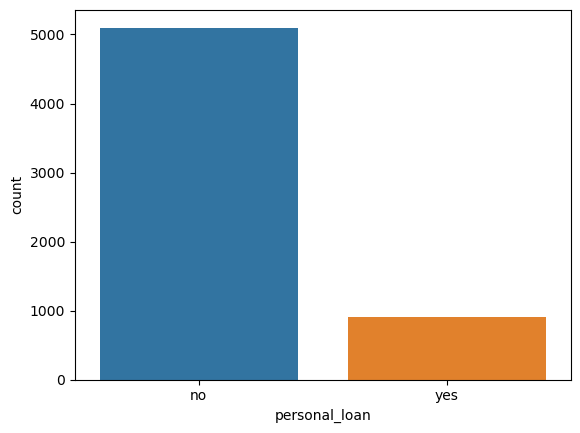

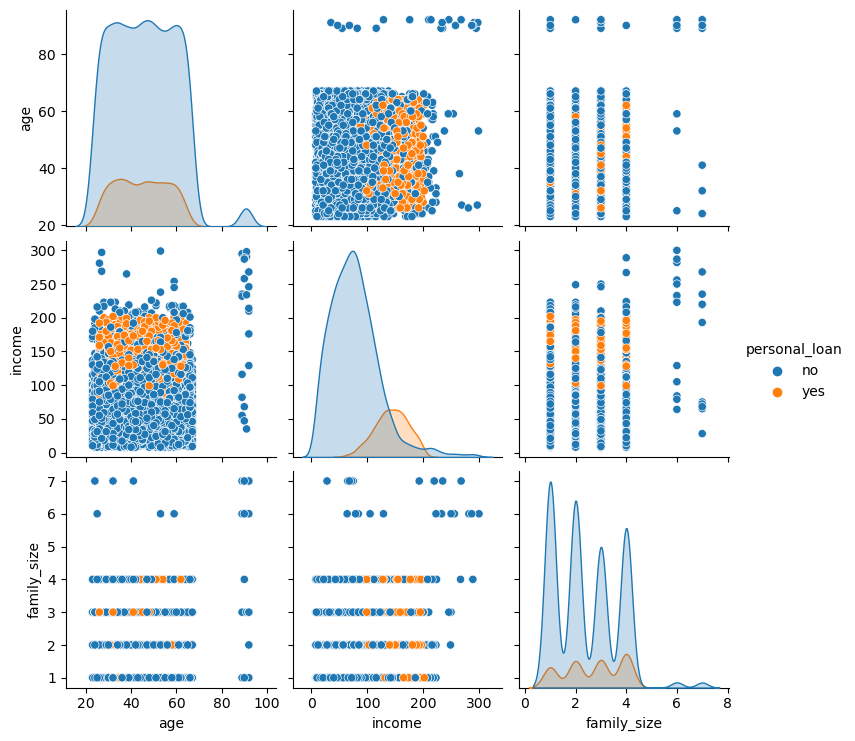

In [76]:
# Visualize the target variable distribution
sns.countplot(x='personal_loan', data=data)
plt.show()

# Visualize the distribution of some features
sns.pairplot(data, hue='personal_loan', vars=['age', 'income', 'family_size'])
plt.show()

<Figure size 1500x1000 with 0 Axes>

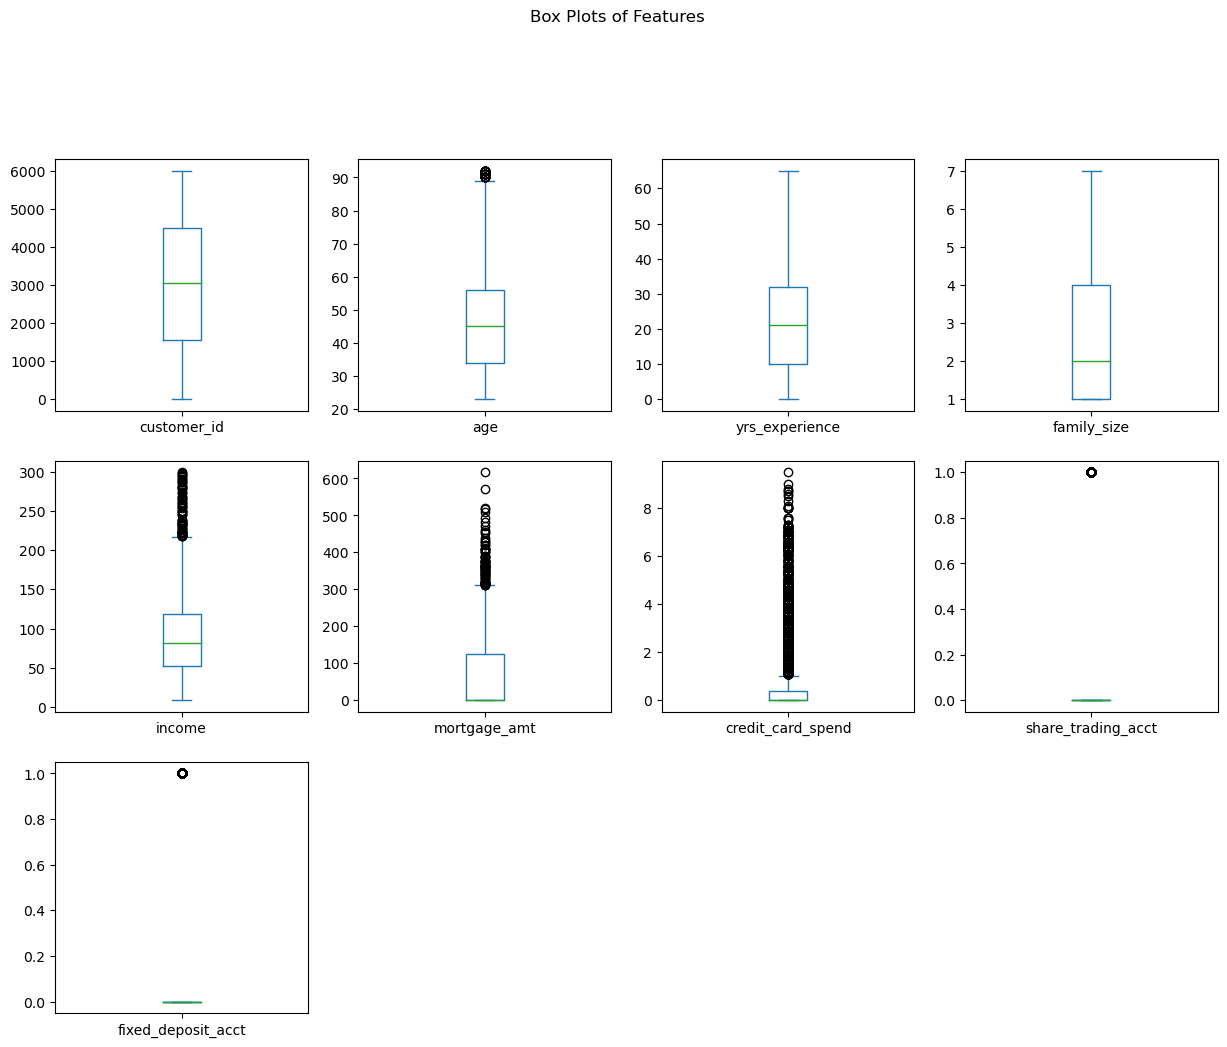

In [77]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 15))
plt.suptitle("Box Plots of Features")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16108\3855182816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


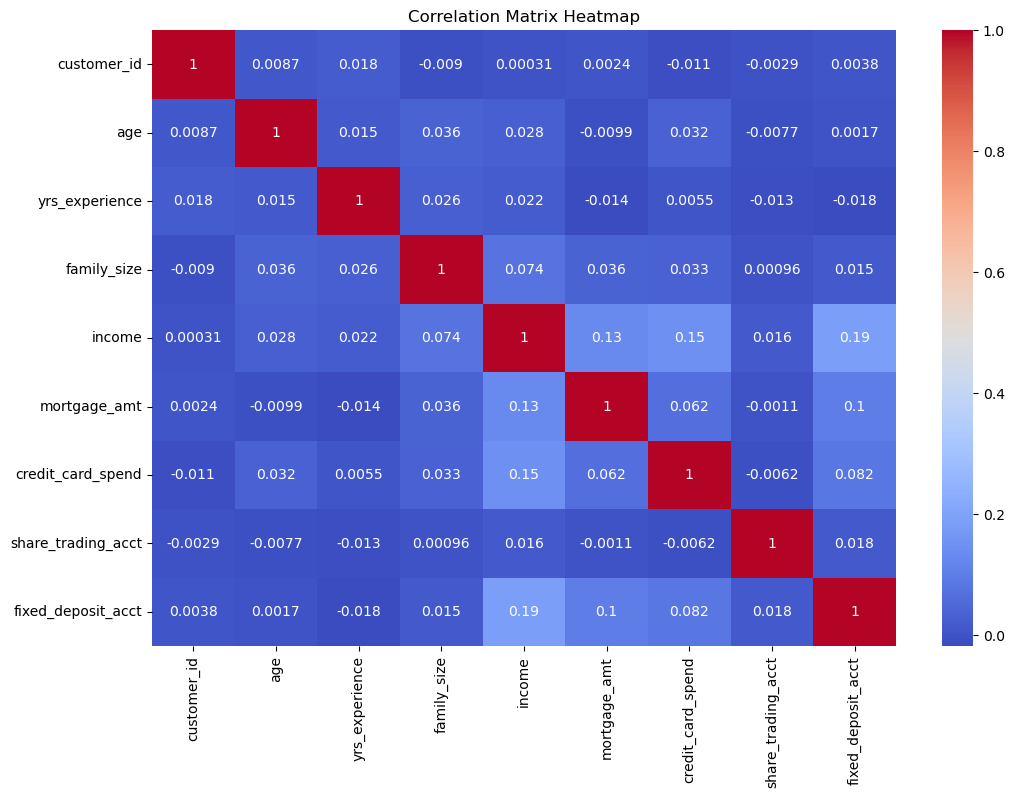

In [78]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

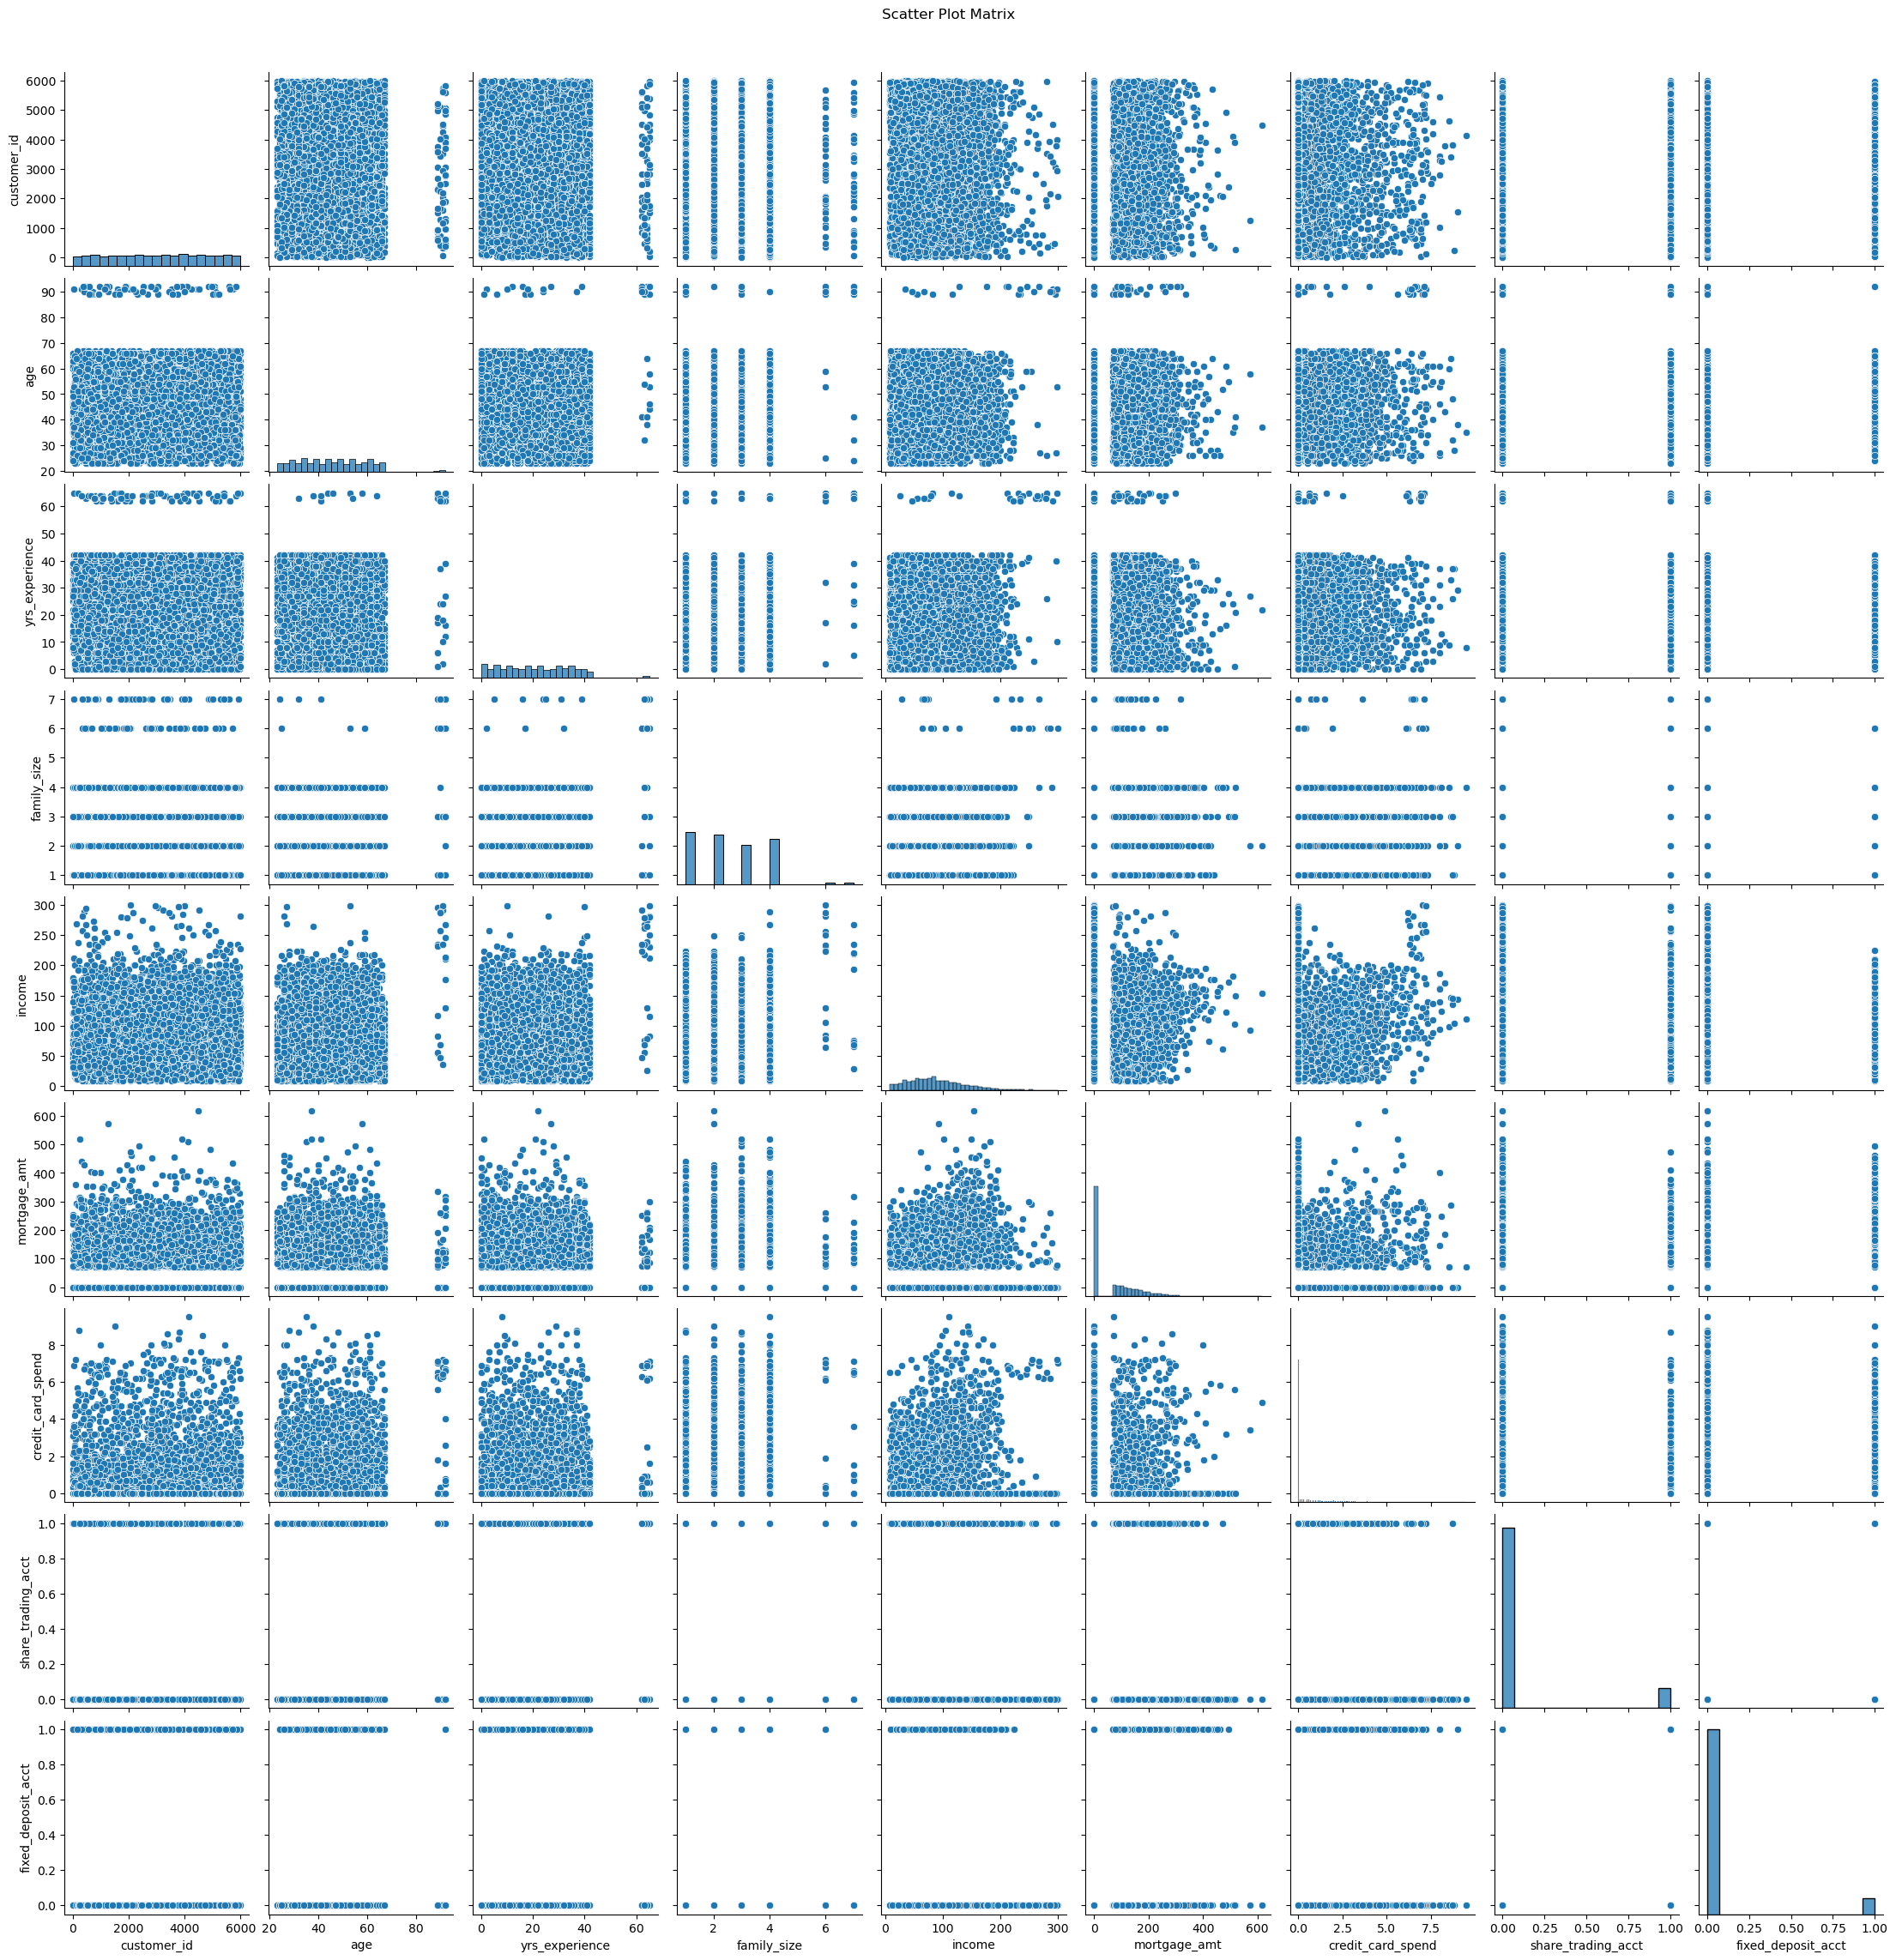

In [79]:
# Scatter plot matrix
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

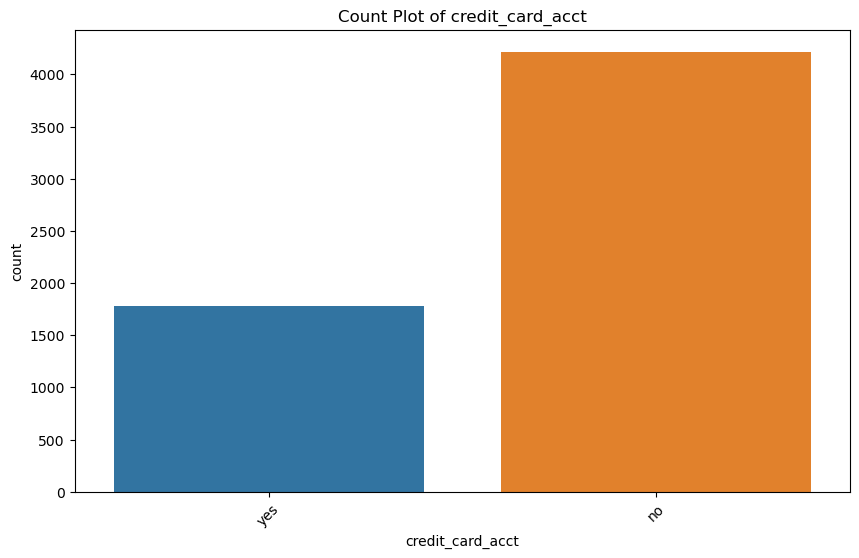

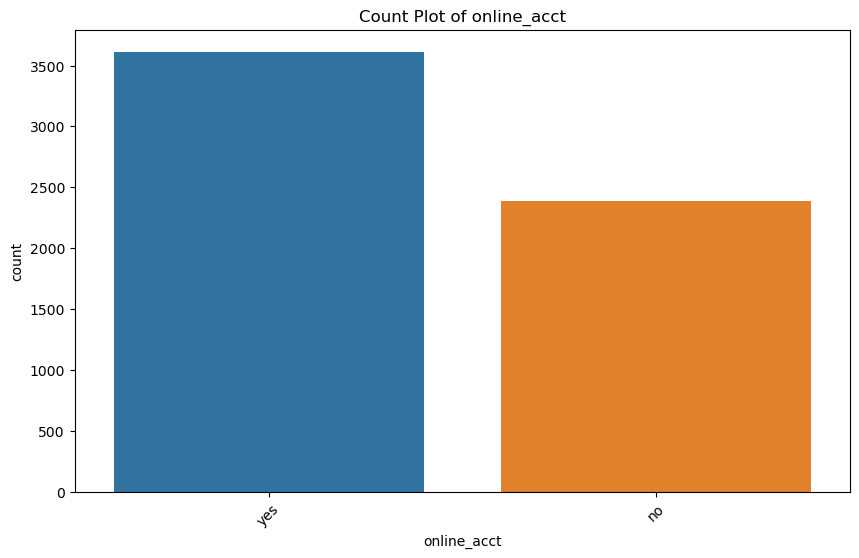

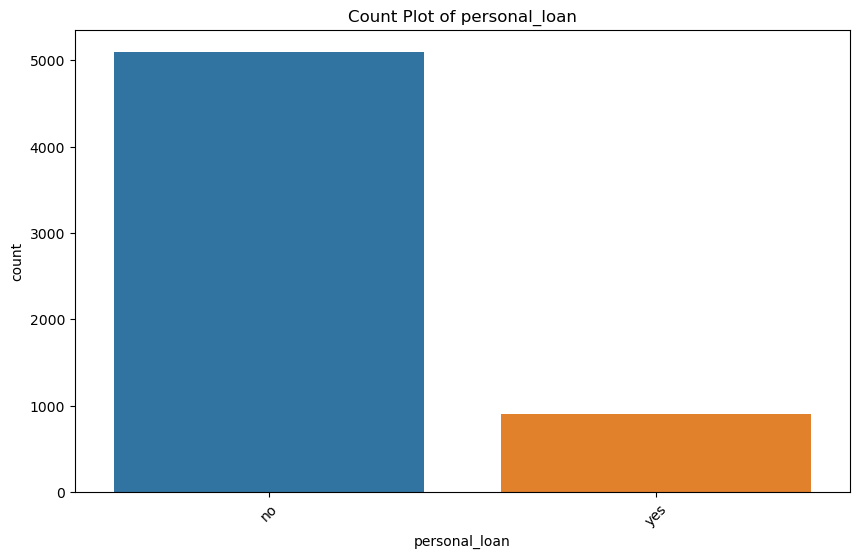

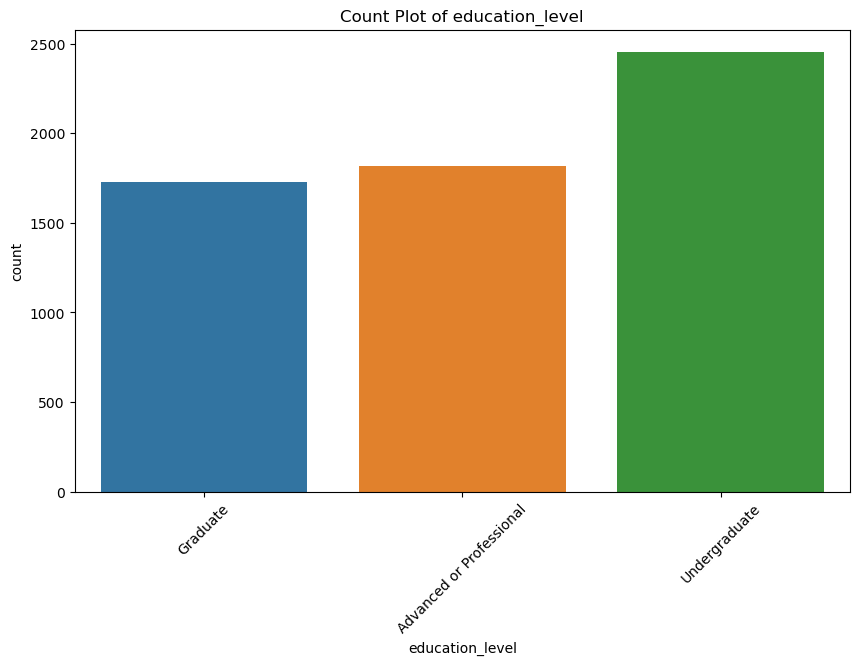

In [80]:
# Count plot for a categorical variable
categorical_columns = ['credit_card_acct', 'online_acct', 'personal_loan','education_level']

# Loop through the categorical columns and create count plots
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

### Handling Null Values

In [81]:
# Fill missing values for specific numerical columns with mean
columns_to_fill = ['age', 'yrs_experience', 'family_size', 'income']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [82]:
# Check for missing values
print(" Columns \t Null Values")
print("----------------------------")
print(df.isnull().sum())


 Columns 	 Null Values
----------------------------
customer_id           0
age                   0
yrs_experience        0
family_size           0
education_level       0
income                0
mortgage_amt          0
credit_card_acct      0
credit_card_spend     0
share_trading_acct    0
fixed_deposit_acct    0
online_acct           0
personal_loan         0
dtype: int64


#### There are no more null Values

### Checking Duplicates

In [83]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 0


#### No Duplicate Values

### Removing Outliers

C:\Users\Hp\AppData\Local\Temp\ipykernel_16108\3678652822.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


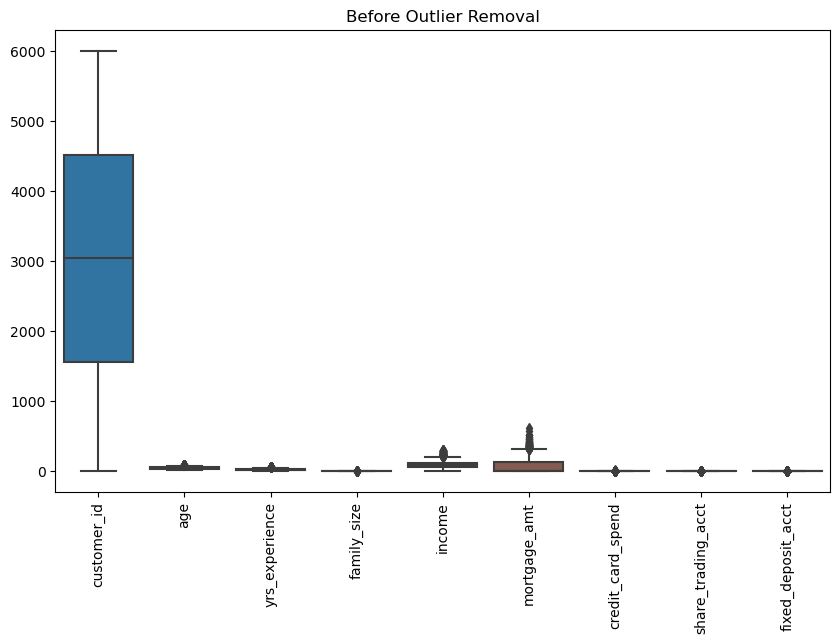

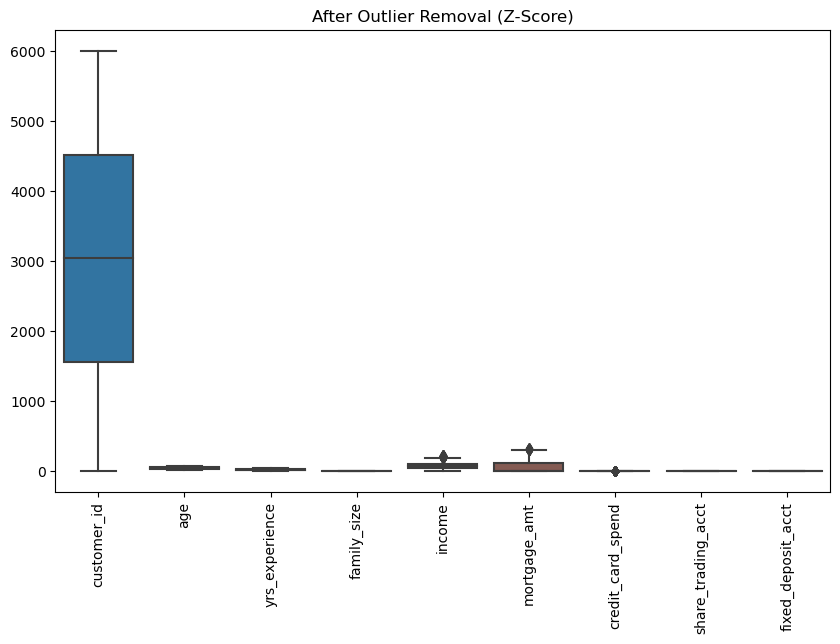

((6000, 13), (4685, 13))

In [118]:

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers
df_outliers_removed_iqr = remove_outliers_iqr(df)
df_outliers_removed_zscore = remove_outliers_zscore(df)

# Visualize with boxplot
def plot_boxplots(df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_boxplots(df, "Before Outlier Removal")
plot_boxplots(df_outliers_removed_zscore, "After Outlier Removal (Z-Score)")

# Verify the changes
(df.shape, df_outliers_removed_zscore.shape)


Certainly! Here's a explanation of removing Outliers:

1. **Z-Score Method:**
   - **Calculate Z-Scores:** Z-scores are computed for numerical columns.
   - **Identify Outliers:** Values with Z-scores greater than a specified threshold (default 3) are considered outliers.
   - **Remove Outliers:** Rows with outliers are removed.

2. **Visualization:** Boxplots are created to visualize the distribution of numerical columns before and after outlier removal.

3. **Results Comparison:** The shapes of the original and modified datasets are compared to see the effect of outlier removal.

In summary, the code identifies and removes outliers from the dataset using both the IQR and Z-score methods, then visualizes and compares the results.